In [2]:
import pandas as pd
import os
import env
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pydataset import data
from telco_acquire import get_telco_data
import warnings
warnings.filterwarnings('ignore')
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import scipy.stats as stats

## Acquire the data

In [3]:
df = get_telco_data()

In [4]:
df = df.loc[:,~df.columns.duplicated()]

In [5]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,1,Yes,...,Yes,3,Yes,2,90.45,5957.9,No,Two year,DSL,Mailed check
1,0017-DINOC,Male,0,No,No,54,No,No phone service,1,Yes,...,No,3,No,4,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,0019-GFNTW,Female,0,No,No,56,No,No phone service,1,Yes,...,No,3,No,3,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,0056-EPFBG,Male,0,Yes,Yes,20,No,No phone service,1,Yes,...,No,3,Yes,4,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,0078-XZMHT,Male,0,Yes,No,72,Yes,Yes,1,No,...,Yes,3,Yes,3,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


We will add in another column, has_churned, so that we can perform statistical tests on churn. 

In [6]:
df['has_churned'] = df['churn'].map({'Yes': 1, 'No': 0})

In [7]:
df[df.internet_service_type_id == 2]

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,has_churned
2421,0013-SMEOE,Female,1,Yes,No,71,Yes,No,2,Yes,...,3,Yes,3,109.70,7904.25,No,Two year,Fiber optic,Bank transfer (automatic),0
2422,0014-BMAQU,Male,0,Yes,No,63,Yes,Yes,2,Yes,...,3,Yes,4,84.65,5377.8,No,Two year,Fiber optic,Credit card (automatic),0
2423,0017-IUDMW,Female,0,Yes,Yes,72,Yes,Yes,2,Yes,...,3,Yes,4,116.80,8456.75,No,Two year,Fiber optic,Credit card (automatic),0
2424,0019-EFAEP,Female,0,No,No,72,Yes,Yes,2,Yes,...,3,Yes,3,101.30,7261.25,No,Two year,Fiber optic,Bank transfer (automatic),0
2425,0020-INWCK,Female,0,Yes,Yes,71,Yes,Yes,2,No,...,3,Yes,4,95.75,6849.4,No,Two year,Fiber optic,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5512,9965-YOKZB,Male,1,No,No,9,Yes,Yes,2,No,...,1,Yes,1,83.85,790.15,Yes,Month-to-month,Fiber optic,Electronic check,1
5513,9971-ZWPBF,Male,1,Yes,Yes,34,Yes,Yes,2,No,...,1,Yes,1,108.90,3625.2,No,Month-to-month,Fiber optic,Electronic check,0
5514,9974-JFBHQ,Male,0,No,Yes,64,Yes,No,2,No,...,1,Yes,4,99.15,6171.2,No,Month-to-month,Fiber optic,Credit card (automatic),0
5515,9985-MWVIX,Female,0,No,No,1,Yes,No,2,No,...,1,Yes,2,70.15,70.15,Yes,Month-to-month,Fiber optic,Mailed check,1


#### Create a data dictionary for our README.md file.

In [8]:
details = {
    'Target' : ['churn'],
    'Dataype' : [df.dtypes['churn']],
    'Definition' : ['Whether or not a customer has churned'],
}

In [9]:
dict_churn = pd.DataFrame(details)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

In [11]:
dictionary = {
    'Feature' : [
                'customer_id', 
                 'gender', 
                 'senior_citizen', 
                 'partner', 
                 'dependents', 
                 'tenure', 
                 'phone_service', 
                 'multiple_lines', 
                 'internet_service_type_id', 
                'online_security', 
                'online_backup', 
                'device_protection',
                'tech_support', 
                'streaming_tv', 
                'streaming_movies', 
                'contract_type_id', 
                'paperless_billing', 
                'payment_type_id', 
                'monthly_charges',
                'total_charges',
                'churn',
                'contract_type',
                'internet_service_type',
                'payment_type',
                'has_churned'
                ],
    'Dataype' : [
                df.dtypes['customer_id'], 
                 df.dtypes['gender'], 
                 df.dtypes['senior_citizen'],
                df.dtypes['partner'],
                 df.dtypes['dependents'], 
                 df.dtypes['tenure'], 
                 df.dtypes['phone_service'], 
                df.dtypes['multiple_lines'],
                 df.dtypes['internet_service_type_id'], 
                df.dtypes['online_security'], 
                df.dtypes['online_backup'], 
                df.dtypes['device_protection'],
                df.dtypes['tech_support'], 
                df.dtypes['streaming_tv'], 
                df.dtypes['streaming_movies'],
                df.dtypes['contract_type_id'], 
                df.dtypes['paperless_billing'], 
                df.dtypes['payment_type_id'], 
                df.dtypes['monthly_charges'],
                df.dtypes['total_charges'],
                df.dtypes['churn'],
                df.dtypes['contract_type'],
                df.dtypes['internet_service_type'],
                df.dtypes['payment_type'],
                df.dtypes['has_churned']
                ],
    'Definition' : ['Identification number for customer', 
                    'Customer gender, male or female', 
                    'Yes or no, is the customer a senior citizen', 
                    'Yes or no, does the customer customer has a parter', 
                    'Number of dependents a customer has', 
                    'Number of days a customer has been with the company', 
                    'Type of phone service plan a customer has', 
                    'Yes or no, does the customer have multiple lines', 
                    '1 for DSL, 2 for Fiber Optic, 3 for None', 
                    'Yes, no, or no internet service',
                    'Yes, no, or no internet service', 
                    'Yes, no, or no internet service',
                    'Yes, no, or no internet service', 
                    'Yes, no, or no internet service',
                    'Yes, no, or no internet service',
                    '1 for month-to-month, 2 for year, and 3 for two-year contract', 
                    'Yes or no, whether or not the customer uses paperless billing', 
                    '1 for electronic check, 2 for mailed check, 3 for automatic bank transfer, 4 for automatic credit card payment',
                    'Monthly charges the customer pays',
                    'Total charges the customer has paid',
                    'Yes or no, whether or not the customer has churned',
                    'Month-to-month, year, or two-year contract',
                    'DSL, Fiber Optic, or None',
                    'Electronic check, mailed check, automatic bank transfer, or automatic credit card payment',
                    '0 for has not churned, 1 for has churned'
                    ],
}

In [12]:
data_dictionary = pd.DataFrame(dictionary)

In [13]:
print(dict_churn.to_markdown(index=False))

| Target   | Dataype   | Definition                            |
|:---------|:----------|:--------------------------------------|
| churn    | object    | Whether or not a customer has churned |


In [14]:
print(data_dictionary.to_markdown(index=False))

| Feature                  | Dataype   | Definition                                                                                                     |
|:-------------------------|:----------|:---------------------------------------------------------------------------------------------------------------|
| customer_id              | object    | Identification number for customer                                                                             |
| gender                   | object    | Customer gender, male or female                                                                                |
| senior_citizen           | int64     | Yes or no, is the customer a senior citizen                                                                    |
| partner                  | object    | Yes or no, does the customer customer has a parter                                                             |
| dependents               | object    | Number of dependents a customer has

## Initial Hypothesis Testing

### Hypothesis 1

**Formulate hypotheses**

$H_0$: There is no difference in the churn rate for customers on month-to-month contracts and the churn rate for customers on either year or two-year contracts. 

$H_a$: There is a significant difference in the churn rate for customers on month-to-month contracts and the churn rate for customers on either year or two-yera contracts. 

**Get data**

In [15]:
month_to_month_customers = df[df.contract_type_id == 1]

In [16]:
year_and_two_year_customers = df[df.contract_type_id != 1]

**Compute p value and test statistic**

In [17]:
tstat, p = stats.ttest_ind(month_to_month_customers.has_churned, year_and_two_year_customers.has_churned)

In [18]:
tstat

37.17984261635385

In [19]:
p

1.9917014247247094e-276

**Make a conclusion based on our data**

Since our p value is less than 0.05, we can conclude that there is a significant difference between the month-to-month customer churn rate and the year-to-year and two-year customer churn rates. 

### Hypothesis 2

**Formulate hypotheses**

$H_0$: There is no correlation between customer churn rate and monthly charges. 

$H_a$: There is a correlation between customer churn rate and monthly charges.

**Get data**

In [20]:
churn_rate = df.has_churned
monthly_charges = df.monthly_charges

**Compute p value and correlation**

In [21]:
corr, p = stats.pearsonr(churn_rate, monthly_charges)
corr, p

(0.19335642223784708, 2.7066456068899293e-60)

**Make conclusion based on our data**

Our p-value is less than 0.05. We reject the null hypothesis and conclude that churn rate and monthly charges are correlated.

## Split the data

In [22]:
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [23]:
train, validate, test = train_validate_test_split(df, target='churn')
train.head(2)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,has_churned
5642,1982-FEBTD,Female,0,Yes,Yes,23,Yes,Yes,3,No internet service,...,3,Yes,4,25.6,514.75,No,Two year,None,Credit card (automatic),0
3338,8982-NHAVY,Male,0,No,No,27,Yes,Yes,2,No,...,2,Yes,3,100.5,2673.45,No,One year,Fiber optic,Bank transfer (automatic),0


In [24]:
train.shape, validate.shape, test.shape

((3943, 25), (1691, 25), (1409, 25))

In [25]:
X_train, y_train = train.drop(columns='churn'), train.churn
X_validate, y_validate = validate.drop(columns='churn'), validate.churn
X_test, y_test = test.drop(columns='churn'), test.churn

In [26]:
X_train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,contract_type,internet_service_type,payment_type,has_churned
5642,1982-FEBTD,Female,0,Yes,Yes,23,Yes,Yes,3,No internet service,...,No internet service,3,Yes,4,25.60,514.75,Two year,None,Credit card (automatic),0
3338,8982-NHAVY,Male,0,No,No,27,Yes,Yes,2,No,...,Yes,2,Yes,3,100.50,2673.45,One year,Fiber optic,Bank transfer (automatic),0
4273,4115-NZRKS,Female,1,No,No,7,Yes,No,2,No,...,Yes,1,Yes,1,89.15,574.35,Month-to-month,Fiber optic,Electronic check,0
2382,9633-DENPU,Female,0,Yes,No,47,Yes,No,1,No,...,No,1,Yes,3,58.60,2723.4,Month-to-month,DSL,Bank transfer (automatic),0
2655,5693-PIPCS,Male,0,No,No,41,Yes,No,2,No,...,Yes,3,Yes,4,99.65,4220.35,Two year,Fiber optic,Credit card (automatic),0


In [27]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 5642 to 6840
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               3943 non-null   object 
 1   gender                    3943 non-null   object 
 2   senior_citizen            3943 non-null   int64  
 3   partner                   3943 non-null   object 
 4   dependents                3943 non-null   object 
 5   tenure                    3943 non-null   int64  
 6   phone_service             3943 non-null   object 
 7   multiple_lines            3943 non-null   object 
 8   internet_service_type_id  3943 non-null   int64  
 9   online_security           3943 non-null   object 
 10  online_backup             3943 non-null   object 
 11  device_protection         3943 non-null   object 
 12  tech_support              3943 non-null   object 
 13  streaming_tv              3943 non-null   object 
 14  strea

## Clean the data

In [28]:
dummy_df = pd.get_dummies(X_train[['partner', 'dependents', 'gender', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']], drop_first=True)
X_train = pd.concat([X_train, dummy_df], axis=1)

In [29]:
X_train = X_train.drop(columns = ['customer_id', 'gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract_type', 'internet_service_type', 'payment_type', 'has_churned'])

In [30]:
X_train.head()

,senior_citizen,tenure,internet_service_type_id,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,partner_Yes,dependents_Yes,...,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes
5642,0,23,3,3,Yes,4,25.60,514.75,1,1,...,1,0,1,0,1,0,1,0,1,0
3338,0,27,2,2,Yes,3,100.50,2673.45,0,0,...,0,0,0,1,0,0,0,1,0,1
4273,1,7,2,1,Yes,1,89.15,574.35,0,0,...,0,0,0,0,0,0,0,1,0,1
2382,0,47,1,1,Yes,3,58.60,2723.4,1,0,...,0,1,0,0,0,0,0,1,0,0
2655,0,41,2,3,Yes,4,99.65,4220.35,0,0,...,0,1,0,0,0,1,0,1,0,1


In [31]:
X_train = X_train.drop(columns = ['paperless_billing', 'total_charges'])

In [32]:
X_train.head()

,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,partner_Yes,dependents_Yes,gender_Male,phone_service_Yes,...,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes
5642,0,23,3,3,4,25.60,1,1,0,1,...,1,0,1,0,1,0,1,0,1,0
3338,0,27,2,2,3,100.50,0,0,1,1,...,0,0,0,1,0,0,0,1,0,1
4273,1,7,2,1,1,89.15,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
2382,0,47,1,1,3,58.60,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0
2655,0,41,2,3,4,99.65,0,0,1,1,...,0,1,0,0,0,1,0,1,0,1


## Baseline Accuracy

In [33]:
train.churn.value_counts()

No     2897
Yes    1046
Name: churn, dtype: int64

The majority of our customers have not churned, so our baseliene assumption is that cutsomers will not churn.

In [34]:
model = DummyClassifier(strategy= 'constant', constant ='No')

In [35]:
model.fit(X_train, y_train)

DummyClassifier(constant='No', strategy='constant')

In [36]:
accuracy = round(model.score(X_train, y_train), 2)
print(f'Training accuracy: {accuracy}')

Training accuracy: 0.73


## Decision Tree

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import graphviz
from graphviz import Graph
from sklearn import tree
import numpy
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [38]:
clf1 = DecisionTreeClassifier(max_depth=3, random_state=123)

In [39]:
clf1 = clf1.fit(X_train, y_train)

In [40]:
clf1

DecisionTreeClassifier(max_depth=3, random_state=123)

In [41]:
dot_data = export_graphviz(clf1, feature_names= X_train.columns, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('telco_tree', view=True)

'telco_tree.pdf'

The tree indicates to us that the main predictor of churn is contract type. Customers with contract type ID 1 are more likely to churn than customers with contract type ID 2 and 3.

Of customers who have contract type iD one, the biggest predictor of churn is monthly charges less than 64.43.

3 is a year contract, 2 is yearly, 1 is month to month

### Probability of churn

In [47]:
y_pred = clf1.predict(X_train)

In [48]:
y_pred_proba = clf1.predict_proba(X_train)

In [49]:
y_probability = pd.DataFrame(y_pred_proba)
y_probability.head()

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


### Evaluate in-sample results

#### Accuracy score

In [50]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf1.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 1.00


#### Confusion Matrix

In [51]:
confusion_matrix(y_train, y_pred)

array([[2897,    0],
       [   0, 1046]])

In [52]:
labels1 = ['no_churn_actual', 'churn_actual']
labels2 = ['no_churn_predicted', 'churn_predicted']

pd.DataFrame(confusion_matrix(y_train, y_pred), index = labels1, columns = labels2)

,no_churn_predicted,churn_predicted
no_churn_actual,2897,0
churn_actual,0,1046


### Classification Report

In [53]:
classification_report_churn = pd.DataFrame(classification_report(y_train, y_pred, output_dict = True)).T

In [54]:
classification_report_churn

,precision,recall,f1-score,support
No,1.0,1.0,1.0,2897.0
Yes,1.0,1.0,1.0,1046.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,3943.0
weighted avg,1.0,1.0,1.0,3943.0


## Random forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)

### Fit the model

In [57]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

### Feature importance

In [58]:
feature_importances = pd.DataFrame(rf.feature_importances_, index = X_train.columns, columns = [ "relative importance"])

In [59]:
feature_importances = feature_importances.sort_values(by = ['relative importance'], ascending = False)

In [60]:
feature_importances.columns.names = ['category']

In [61]:
feature_importances

category,relative importance
has_churned,0.780968
contract_type_id,0.056900
tenure,0.051215
monthly_charges,0.023075
payment_type_id,0.020620
internet_service_type_id,0.010234
tech_support_Yes,0.007628
online_security_Yes,0.005967
online_security_No internet service,0.004540
streaming_tv_No internet service,0.004494


In [82]:
print(feature_importances.to_markdown())

|                                       |   relative importance |
|:--------------------------------------|----------------------:|
| has_churned                           |           0.780968    |
| contract_type_id                      |           0.0568999   |
| tenure                                |           0.0512152   |
| monthly_charges                       |           0.0230751   |
| payment_type_id                       |           0.0206198   |
| internet_service_type_id              |           0.0102344   |
| tech_support_Yes                      |           0.00762794  |
| online_security_Yes                   |           0.00596656  |
| online_security_No internet service   |           0.00454002  |
| streaming_tv_No internet service      |           0.00449428  |
| tech_support_No internet service      |           0.00339178  |
| streaming_movies_No internet service  |           0.0033691   |
| online_backup_No internet service     |           0.0030545   |
| online_b

The above chart indicates to us that the most important values for predicting churn are: **tenure**, **monthly charges**, **contract type**, and **payment type**.

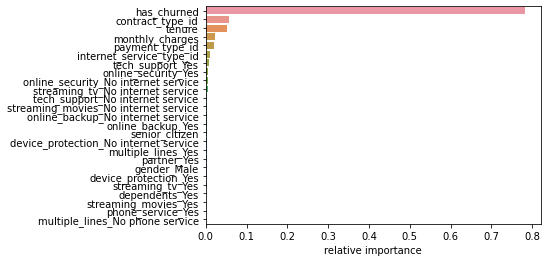

In [62]:
relative_importances = sns.barplot(x=feature_importances['relative importance'], y=feature_importances.index)

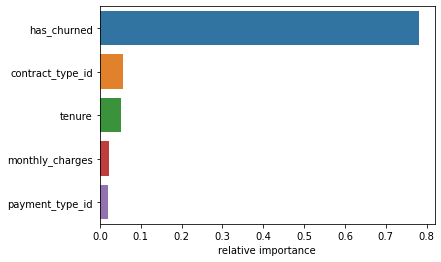

In [63]:
relative_importances = sns.barplot(x=feature_importances['relative importance'][0:5], y=feature_importances.index[0:5])

### Mann Whitney Test

Let's run the Mann Whitney test on these variables to see if they're really correlated with churn.

In [64]:
from scipy.stats import mannwhitneyu
from scipy import stats

In [65]:
train_has_churned = train[train["churn"] == "Yes"]
train_no_churn = train[train["churn"] == "No"]

In [66]:
stats.mannwhitneyu(train_has_churned['tenure'], train_no_churn['tenure'], use_continuity=True)

MannwhitneyuResult(statistic=787745.5, pvalue=5.978994288055496e-118)

In [67]:
stats.mannwhitneyu(train_has_churned['monthly_charges'], train_no_churn['monthly_charges'], use_continuity=True)

MannwhitneyuResult(statistic=1160715.0, pvalue=1.4455529063493655e-29)

In [68]:
stats.mannwhitneyu(train_has_churned['contract_type_id'], train_no_churn['contract_type_id'], use_continuity=True)

MannwhitneyuResult(statistic=789116.0, pvalue=3.760387895572131e-144)

In [69]:
stats.mannwhitneyu(train_has_churned['payment_type_id'], train_no_churn['payment_type_id'], use_continuity=True)

MannwhitneyuResult(statistic=1010432.5, pvalue=4.42203203035722e-62)

In [70]:
stats.mannwhitneyu(train_has_churned['internet_service_type_id'], train_no_churn['internet_service_type_id'], use_continuity=True)

MannwhitneyuResult(statistic=1469861.5, pvalue=0.061278792735769076)

Tenure, monthly charges, contract type id, and payment type are all strongly associated with churn. 

### Make predictions

In [71]:
y_pred = rf.predict(X_train)

In [72]:
pd.DataFrame(y_pred)

,0
0,No
1,No
2,No
3,No
4,No
...,...
3938,Yes
3939,No
3940,Yes
3941,No


### Estimate probability

In [73]:
y_pred_proba = rf.predict_proba(X_train)

In [74]:
pd.DataFrame(y_pred_proba)

,0,1
0,1.000000,0.000000
1,0.983931,0.016069
2,0.942412,0.057588
3,0.986006,0.013994
4,0.987170,0.012830
...,...,...
3938,0.045174,0.954826
3939,1.000000,0.000000
3940,0.079945,0.920055
3941,0.976845,0.023155


#### Accuracy

In [75]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 1.00


#### Confusion matrix

In [76]:
labels1 = ['did not churn actual', 'churned actual']
labels2 = ['did not churn predicted', 'churned predicted']
df_confusion_matrix = pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels1, columns=labels2)

In [77]:
df_confusion_matrix

,did not churn predicted,churned predicted
did not churn actual,2897,0
churned actual,0,1046


#### Classification Report

In [78]:
classification_report_2 = classification_report(y_train, y_pred, output_dict = True)

In [79]:
df_classification_report_2 = pd.DataFrame(classification_report_2).T

In [80]:
df_classification_report_2

,precision,recall,f1-score,support
No,1.0,1.0,1.0,2897.0
Yes,1.0,1.0,1.0,1046.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,3943.0
weighted avg,1.0,1.0,1.0,3943.0
